In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [55]:
#import dataset, withhout text
data= pd.read_csv('bills.csv')

In [56]:
#removing columns that won't be used in my analyses
data= data[['BillID','BillNum','ByReq', 'Commem','Cong','Cosponsr','IntrDate','Mult','MultNo',
           'PassH', 'PassS','PLaw','Private','Title','Veto','Class','ComC','ComR','CumSServ',
            'Gender','LeadCham','LeadSubC','Majority','MRef','NameFirst','NameLast',
          'Party','Postal']]
data.dropna(inplace=True)

In [57]:
data.head()

,BillID,BillNum,ByReq,Commem,Cong,Cosponsr,IntrDate,Mult,MultNo,PassH,...,CumSServ,Gender,LeadCham,LeadSubC,Majority,MRef,NameFirst,NameLast,Party,Postal
0,106-S-1,1,0.0,0,106,10.0,12/15/00,0.0,1.0,0.0,...,0.0,0,0.0,0.0,1,1.0,Mitch,McConnell,200.0,KY
1,106-S-2,2,0.0,0,106,6.0,1/19/99,0.0,1.0,0.0,...,0.0,0,0.0,0.0,1,0.0,James,Jeffords,328.0,VT
2,106-S-3,3,0.0,0,106,17.0,1/19/99,0.0,1.0,0.0,...,0.0,0,0.0,0.0,1,0.0,Rod,Grams,0.0,MN
3,106-S-4,4,0.0,0,106,31.0,1/19/99,0.0,1.0,0.0,...,0.0,0,0.0,0.0,1,1.0,John,Warner,200.0,VA
4,106-S-5,5,0.0,0,106,15.0,1/19/99,0.0,1.0,0.0,...,0.0,0,0.0,0.0,1,1.0,Michael,DeWine,200.0,OH


In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

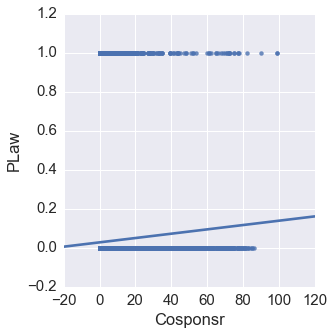

In [27]:
sns.lmplot(x='Cosponsr', y='PLaw', data=data, ci=None)

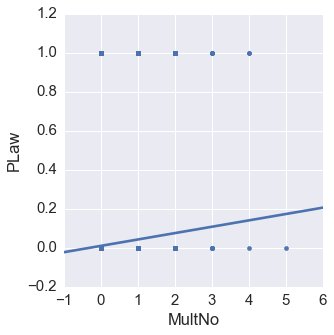

In [28]:
sns.lmplot(x='MultNo', y='PLaw', data=data, ci=None)

In [29]:
data.Class.value_counts()

1    5741
3    5686
2    4957
1    3433
3    2761
2    2489
Name: Class, dtype: int64

In [18]:
data.Gender.value_counts()

0    22971
1     5189
Name: Gender, dtype: int64

In [10]:
data.corr()

,BillNum,ByReq,Commem,Cong,Cosponsr,Mult,MultNo,PassH,PassS,PLaw,...,Veto,ComC,ComR,CumSServ,Gender,LeadCham,LeadSubC,Majority,MRef,Party
BillNum,1.000000,0.001849,0.168251,0.049061,-0.167563,-0.037246,-0.095145,-0.014216,-0.047571,-0.012886,...,-0.009070,0.039733,-0.000019,NaN,0.000772,-0.006782,0.061028,0.041806,-0.004314,-0.022943
ByReq,0.001849,1.000000,-0.011366,-0.059975,-0.017412,0.004483,0.026820,-0.003329,-0.001045,-0.002529,...,-0.000374,0.043422,-0.004181,NaN,-0.017157,-0.007998,-0.001471,0.004095,0.028763,-0.002425
Commem,0.168251,-0.011366,1.000000,0.054063,-0.083510,-0.048108,-0.126869,0.032085,0.026527,0.040529,...,-0.003269,0.075760,0.037631,NaN,0.003041,-0.014223,-0.001061,0.009874,-0.110572,-0.009759
Cong,0.049061,-0.059975,0.054063,1.000000,-0.034336,-0.063175,-0.666456,-0.039946,-0.086217,-0.039796,...,-0.005930,0.040739,-0.047820,NaN,0.090958,-0.039255,0.050687,0.109259,-0.005404,-0.050505
Cosponsr,-0.167563,-0.017412,-0.083510,-0.034336,1.000000,0.018326,0.036972,0.056634,0.087075,0.057376,...,0.015090,-0.027685,-0.005930,NaN,-0.020669,0.061043,NaN,0.015490,0.037994,0.013652
Mult,-0.037246,0.004483,-0.048108,-0.063175,0.018326,1.000000,0.532742,0.205406,0.250947,0.198587,...,-0.001957,-0.006772,-0.011755,NaN,-0.001411,0.002529,NaN,0.012056,0.079947,0.018112
MultNo,-0.095145,0.026820,-0.126869,-0.666456,0.036972,0.532742,1.000000,0.095042,0.150277,0.101110,...,-0.003411,-0.058062,0.017655,NaN,-0.057091,0.006415,NaN,-0.091373,0.085837,0.071092
PassH,-0.014216,-0.003329,0.032085,-0.039946,0.056634,0.205406,0.095042,1.000000,0.693425,0.943551,...,0.043405,-0.007714,-0.015605,NaN,-0.024065,0.017042,0.005205,0.048116,0.037744,0.047652
PassS,-0.047571,-0.001045,0.026527,-0.086217,0.087075,0.250947,0.150277,0.693425,1.000000,0.654562,...,0.030258,-0.002619,-0.006952,NaN,-0.020983,0.024542,-0.001062,0.054823,0.062487,0.060814
PLaw,-0.012886,-0.002529,0.040529,-0.039796,0.057376,0.198587,0.101110,0.943551,0.654562,1.000000,...,-0.001547,-0.005905,-0.014156,NaN,-0.019684,0.015042,0.006339,0.051160,0.033031,0.047651


In [66]:
from sklearn.cross_validation import train_test_split

logreg = LogisticRegression()
feature_cols = ['Cosponsr', 'MultNo', 'Gender','Majority','LeadCham','LeadSubC']
X = data[feature_cols]
y = data.PLaw

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1)

logreg.fit(X_train, y_train)
data['billpass_pred'] = logreg.predict(X)

In [69]:
data.billpass_pred.value_counts()

0.0    25063
1.0        4
Name: billpass_pred, dtype: int64

In [71]:
metrics.accuracy_score(y, data.billpass_pred)

0.96644991422986393

In [60]:
logreg.coef_

array([[ 0.02325564,  0.93612319, -0.18036883,  0.74587665,  0.17633904,
         0.        ]])

In [72]:
logreg = LogisticRegression()
feature_cols = ['Gender']
X = data[feature_cols]
y = data.PLaw

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1)

logreg.fit(X_train, y_train)
data['billpass_pred'] = logreg.predict(X)

In [73]:
metrics.accuracy_score(y, data.billpass_pred)

0.96644991422986393